In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [203]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [307]:
data_path='../../edu/COVID-19/csse_covid_19_data/csse_covid_19_time_series'

f_confirmed='{}/time_series_19-covid-Confirmed.csv'.format(data_path)
f_deaths='{}/time_series_19-covid-Deaths.csv'.format(data_path)
# f_recovered='time_series_19-covid-Recovered.csv'.format(data_path)

In [319]:
df_c=covid19.data.reformat(f_confirmed,varname='confirmed')
df_d=covid19.data.reformat(f_deaths,varname='deaths')

In [320]:
myloc='UK'
if myloc=='UK':
    thisloc='United Kingdom - United Kingdom'
else:
    thisloc=myloc
# myloc='Spain'
mydf=pd.concat([df_c[df_c.location==thisloc]['confirmed'],df_d[df_d.location==thisloc]['deaths']],axis=1)
mydf.tail()

,confirmed,deaths
date,,
2020-03-14,1140,21.0
2020-03-15,1140,21.0
2020-03-16,1543,55.0
2020-03-17,1950,55.0
2020-03-18,2626,71.0


In [333]:
mydf['deaths']['2020-03-17']=60
mydf['deaths']['2020-03-18']=103


/Users/edu/anaconda3/envs/COVID19/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/edu/anaconda3/envs/COVID19/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [334]:
mydf.tail()

,confirmed,deaths
date,,
2020-03-14,1140,21.0
2020-03-15,1140,21.0
2020-03-16,1543,55.0
2020-03-17,1950,60.0
2020-03-18,2626,103.0


In [346]:
# START_FIT='2020-03-13'
# STOP_FIT='2020-03-16'

EXTRAPOLATE = ('2020-02-28', '2020-03-25')

fits={}
# fits['confirmed_0']=covid19.fit.ExponentialFit.from_frame('confirmed', mydf, start='2020-03-05', stop='2020-03-11')
# fits['confirmed_1']=covid19.fit.ExponentialFit.from_frame('confirmed', mydf, start='2020-03-06', stop='2020-03-11')
fits['confirmed']=covid19.fit.ExponentialFit.from_frame('confirmed', mydf, start='2020-03-15', stop='2020-03-18')

# fits['deaths_0']=covid19.fit.ExponentialFit.from_frame('deaths', mydf, start='2020-03-06', stop='2020-03-10')
fits['deaths']=covid19.fit.ExponentialFit.from_frame('deaths', mydf, start='2020-03-15', stop='2020-03-18')

## Recent evolution

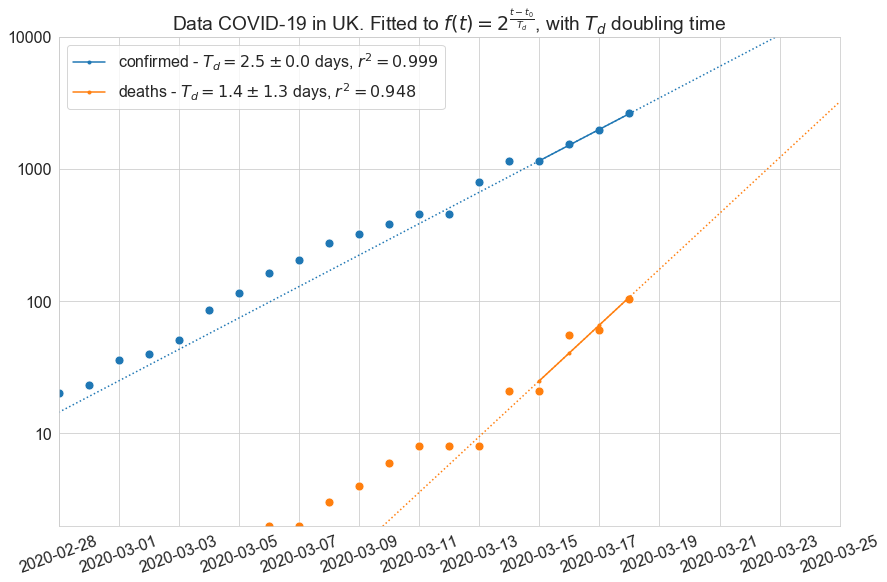

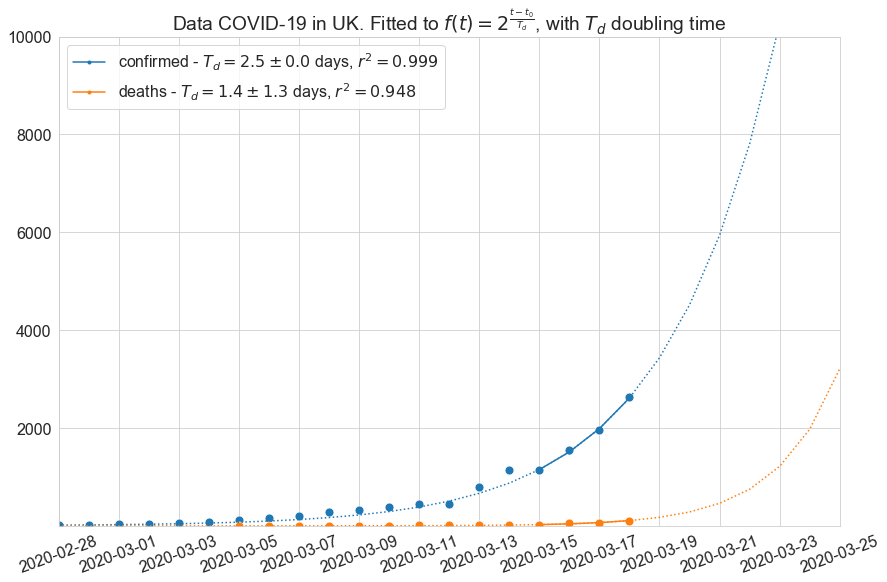

In [347]:
for yscale in ['log','linear']:
    _, ax = plt.subplots(subplot_kw={'yscale': yscale, 'ylim': (2, 10000)})
    # covid19.plot.plot_fit(ax, fits['confirmed_0'], color=sns.color_palette()[0])
    # covid19.plot.plot_fit(ax, fits['confirmed_1'], color=sns.color_palette()[0])

    # covid19.plot.plot_fit(ax, fits['deaths_0'], color=sns.color_palette()[1])

    for kind, color in zip(['confirmed', 'deaths'], sns.color_palette()):
        covid19.plot.plot(ax, mydf[kind], fits[kind], label=kind.replace('_', ' '), extrapolate=EXTRAPOLATE, color=color, date_interval=2)


    _ = ax.set(title=r'Data COVID-19 in {}. Fitted to $f(t) = 2 ^ \frac{{t - t_0}}{{T_d}}$, with $T_d$ doubling time'.format(myloc) )


## What will happen?

In [348]:
kinds = ['confirmed', 'deaths']
datetime_expected = '2020-03-19'
expected_values = []
for kind in kinds:
    expected_values.append(int(round(fits[kind].predict(datetime_expected))))
print(', '.join(f'{k}: {v}' for v, k in zip(expected_values, kinds)))

confirmed: 3435, deaths: 174


In [306]:
for key, value in list(fits.items())[:10]:
    print(f'{key} {" " * (26 - len(key))}{str(value)}')

confirmed                  T_d=3.05, T_d_err=0.02, t_0='2020-02-12', r^2=0.992 start='2020-03-05', stop='2020-03-17'
deaths                     T_d=1.83, T_d_err=0.41, t_0='2020-03-06', r^2=0.943 start='2020-03-11', stop='2020-03-17'
